In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

from nilearn import image
from nilearn import plotting

In [6]:
def unit_normalize(image):
    '''Normalizes the image volume values between [0,1].
    Args:
        image: 3D image volume

    Returns:
        image: normalized image
    '''

    image = image - np.amin(image)
    image = image / np.amax(image)

    return image

In [13]:
def center_crop(image, crop_shape):
    '''Crops the 3D image to the specified shape.
    Args:
        image: 3D image volume
        crop_shape: shape of the cropped image

    Returns:
        image: center-cropped image
    '''

    if len(crop_shape) != 3:
        print('Wrong crop shape')
        return image

    pad_dims = np.zeros((3, 2), dtype=int)

    for i in range(0, 3):
        if(image.shape[i] < crop_shape[i]):
            pad_dims[i, :] = ((crop_shape[i] - image.shape[i]) // 2, (crop_shape[i] - image.shape[i]) // 2)

    image = np.pad(image,
                   ((pad_dims[0, 0], pad_dims[0, 1]),
                   (pad_dims[1, 0], pad_dims[1, 1]),
                   (pad_dims[2, 0], pad_dims[2, 1])),
                   'constant')

    crop_dims = np.zeros((3, 2), dtype=int)

    for i in range(0, 3):
        crop_dims[i, 1] = image.shape[i] - 1
        if (image.shape[i] > crop_shape[i]):
            crop_dims[i, :] = ((image.shape[1] - crop_shape[1]) // 2, (image.shape[1] + crop_shape[1]) // 2)

    image = image[crop_dims[0, 0] : crop_dims[0, 1],
            crop_dims[1, 0] : crop_dims[1, 1],
            crop_dims[2, 0] : crop_dims[2, 1]]

    return image

In [14]:
def center_image(image, threshold = 100, max_distance = 5):
    '''Find the center of an image.
    Args:
        image: 3D image volume
        threshold: threshold to filter out noises
        max_distance: maximum distance between two adjacent cells, used
        to filter out noises

    Returns:
        center: center of the image
    '''

    brain = np.argwhere(image > threshold)
    size_dimension = brain.shape[0]
    center = np.array([0,0,0])
    for i in range(3):
        dimension = brain[:,i]
        dimension.sort()
        min_dim = dimension[0]
        max_dim = dimension[size_dimension-1]
        for j in range(size_dimension//2-1):
            if dimension[j+1]-dimension[j]>max_distance:
                in_dim = dimension[j+1]
        for j in range(size_dimension//2, size_dimension-1):
            if dimension[j+1]-dimension[j]>max_distance:
                max_dim = dimension[j]
        if max_dim - min_dim > 50:
            center[i] = (max_dim+min_dim)//2
        else:
            center[i] = image.shape[i]//2
    return center

In [15]:
brain_img = image.load_img('raw/IXI012-HH-1211-T1.nii.gz')
brain_img.shape

(256, 256, 150)

In [16]:
brain_img.get_data()

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

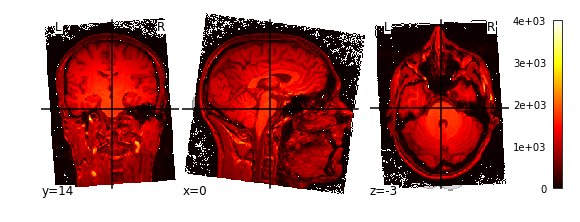

In [9]:
plotting.plot_stat_map('raw/IXI012-HH-1211-T1.nii.gz')